# Analysis 1
## Objective: 
- for each day in a week, find number of business that have most check-ins on that day
- for each hour in a day, find number of business that have most check-ins in that hour
## Steps:
- use checkin.json in data set
- for each business, find the day with most check-ins in a week
- for each business, find the hour with most check-ins in a day
- calculate total number of business that have most check-ins on each day and in each hour

In [2]:
%matplotlib inline

In [3]:
import glob
import os
import json
from pathlib import Path
from pandas import Series, DataFrame
import pandas as pd

In [4]:
p = Path(os.getcwd())
checkin_path = str(p.parent) + '/data/yelp_training_set/yelp_training_set_checkin.json'

In [5]:
def calculateMaxHourAndDay(listOfDicts):
    checkins = {'time': list(listOfDicts.keys()), 'num': list(listOfDicts.values())}
    df = DataFrame(checkins)
    df['day'] = df['time'].apply(lambda x: x.split('-')[1])
    df['hour'] = df['time'].apply(lambda x: x.split('-')[0])
    df.apply(pd.to_numeric, errors='ignore')
#     print(df.head(10))
#     print('==================')
    max_day = df.groupby(['day']).sum()['num'].argmax()
    max_hour = df.groupby(['hour']).sum()['num'].argmax()
    return max_day, max_hour
#     print(max_day)
#     print(max_hour)

In [6]:
id_list = []
i = 0
check_in_max = pd.DataFrame(columns=['business_id', 'max_day', 'max_hour'])
with open(checkin_path, 'r', encoding='utf-8', errors='ignore') as f:
    for line in f:
        data = json.loads(line)
        business_id = data['business_id']
        id_list.append(business_id)
        listOfDicts = data['checkin_info']
        max_day, max_hour = calculateMaxHourAndDay(listOfDicts)
        check_in_max = check_in_max.append(Series({'business_id': business_id, 'max_day': max_day, 'max_hour': max_hour}), ignore_index=True)
        
# print(len(id_list))
# id_set = set(id_list)
# print(len(id_set))
check_in_max.head(5)

,business_id,max_day,max_hour
0,KO9CpaSPOoqm0iCWm5scmg,3,12
1,oRqBAYtcBYZHXA7G8FlPaA,5,18
2,6cy2C9aBXUwkrh4bY1DApw,5,11
3,D0IB17N66FiyYDCzTlAI4A,5,11
4,HLQGo3EaYVvAv22bONGkIw,5,12


In [7]:
check_in_max.to_csv('ana_1/max_check_ins.csv', index = False, header = True)

In [8]:
max_day_total = check_in_max['max_day'].value_counts()
max_day_total = max_day_total.sort_index()
max_day_total = max_day_total.rename({'0': 'SUN.', '1': 'MON.', '2': 'TUE.', '3': 'WED.', '4': 'THU.', '5': 'FRI.', '6': 'SAT.'})
max_day_total

SUN.     887
MON.     846
TUE.     816
WED.     782
THU.    1522
FRI.    2469
SAT.     960
Name: max_day, dtype: int64

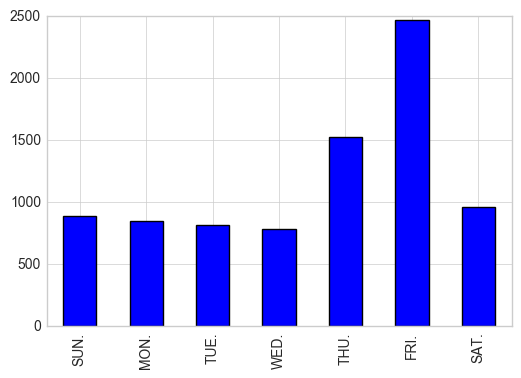

In [9]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
plt.figure()
max_day_total.plot(kind = 'bar')
# plt.show()
plt.savefig('ana_1/max_day_check_ins.png')

In [10]:
max_hour_total = check_in_max['max_hour'].value_counts().reset_index()
max_hour_total.columns = ['hour', 'num']
max_hour_total['hour'] = pd.to_numeric(max_hour_total['hour'])
max_hour_total = max_hour_total.sort_values('hour')
max_hour_total['hour'] = max_hour_total['hour'].apply(lambda x: str(x)+':00-'+str(x)+':59')
max_hour_total.head(5)

,hour,num
17,0:00-0:59,57
19,1:00-1:59,35
23,2:00-2:59,3
22,3:00-3:59,4
21,4:00-4:59,9


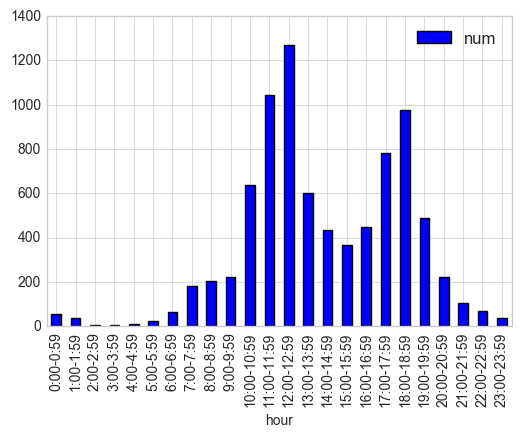

In [11]:
plt.figure()
max_hour_total.plot(kind = 'bar', x = 'hour', y = 'num')
plt.savefig('ana_1/max_hour_check_ins.png')